# Youtube Trend Analysis

 **GOAL -** This project aims to analyze the videos featured in Youtube Trends.
 
 **OBJECTIVE -** To analyze what are the most popular categories, how views differ based on categories, whats are the viewers reactions(Like and Dislike), top Youtube channels creating frequent trending videos and how there viwers be like.
 
 **DATASET I'LL BE USING -** [kaggle](https://www.kaggle.com/rsrishav/youtube-trending-video-dataset) - by [Rishav Sharma](https://www.kaggle.com/rsrishav)
 
 **A LITTLE ABOUT DATASET -** This dataset is a record of the top trending YouTube videos from 12-08-2020 to 10-10-2020.

### Question the following project will be answering.

1. [What categories does the trending videos belong to?](#What-categories-does-the-trending-videos-belong-to?)
2. [Which category has maximum number of videos between 12-08-2020 to 10-10-2020 in trending section?](#Which-category-has-maximum-number-of-videos-between-12-08-2020-to-10-10-2020-in-trending-section?)
3. [Which category has a better average views per video?](#Which-category-has-a-better-average-views-per-video?)
4. [Which category has a larger user reactions(LIKE and DISLIKE)?](#Which-category-has-a-larger-user-reactions(LIKE-and-DISLIKE)?)
5. [Which youtube creator has a most content reaching to trending section?](#Which-youtube-creator-has-a-most-content-reaching-to-trending-section?)
6. [Which youtube channel has most average views per video?](#Which-youtube-channel-has-most-average-views-per-video?)
7. [Which channel gets the most user reaction in their videos?](#Which-channel-gets-the-most-user-reaction-in-their-videos?)

### Importing  Libraries
Importing some neccessary libraries required throughout the project.

In [8]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

Making changes to make charts more appealing and informative.

In [9]:
sns.set_style("whitegrid")
matplotlib.rcParams['font.size'] = 13
matplotlib.rcParams['figure.figsize'] = (14, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

###  Data Preperation

Here I w'll be using two different yet inter-related dataset

In [10]:
youtube_trending_df = pd.read_csv("IN_youtube_trending_data.csv")
youtube_trending_df.head(3) # Viewing the first 3 rows

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,Iot0eF6EoNA,Sadak 2 | Official Trailer | Sanjay | Pooja | ...,2020-08-12T04:31:41Z,UCGqvJPRcv7aVFun-eTsatcA,FoxStarHindi,24,2020-08-12T00:00:00Z,sadak|sadak 2|mahesh bhatt|vishesh films|pooja...,9885899,224925,3979409,350210,https://i.ytimg.com/vi/Iot0eF6EoNA/default.jpg,False,False,Three Streams. Three Stories. One Journey. Sta...
1,x-KbnJ9fvJc,Kya Baat Aa : Karan Aujla (Official Video) Tan...,2020-08-11T09:00:11Z,UCm9SZAl03Rev9sFwloCdz1g,Rehaan Records,10,2020-08-12T00:00:00Z,[None],11308046,655450,33242,405146,https://i.ytimg.com/vi/x-KbnJ9fvJc/default.jpg,False,False,Singer/Lyrics: Karan Aujla Feat Tania Music/ D...
2,KX06ksuS6Xo,Diljit Dosanjh: CLASH (Official) Music Video |...,2020-08-11T07:30:02Z,UCZRdNleCgW-BGUJf-bbjzQg,Diljit Dosanjh,10,2020-08-12T00:00:00Z,clash diljit dosanjh|diljit dosanjh|diljit dos...,9140911,296533,6179,30058,https://i.ytimg.com/vi/KX06ksuS6Xo/default.jpg,False,False,CLASH official music video performed by DILJIT...


In [11]:
# Dropping unimportant columns from youtube_trending_df
youtube_trending_df = youtube_trending_df.drop(['video_id', 'channelId', 'tags', 'thumbnail_link', 'description'], axis = 1);
youtube_trending_df.head(3)

,title,publishedAt,channelTitle,categoryId,trending_date,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled
0,Sadak 2 | Official Trailer | Sanjay | Pooja | ...,2020-08-12T04:31:41Z,FoxStarHindi,24,2020-08-12T00:00:00Z,9885899,224925,3979409,350210,False,False
1,Kya Baat Aa : Karan Aujla (Official Video) Tan...,2020-08-11T09:00:11Z,Rehaan Records,10,2020-08-12T00:00:00Z,11308046,655450,33242,405146,False,False
2,Diljit Dosanjh: CLASH (Official) Music Video |...,2020-08-11T07:30:02Z,Diljit Dosanjh,10,2020-08-12T00:00:00Z,9140911,296533,6179,30058,False,False


In [12]:
youtube_trending_df.shape

(11230, 11)

In [14]:
category_df = pd.read_csv("IN_category_id.csv")
category_df.head(3) # Viewing the first 3 rows

,etag,id,category,snippet__assignable,snippet__channelId
0,IfWa37JGcqZs-jZeAyFGkbeh6bc,1,Film & Animation,True,UCBR8-60-B28hp2BmDPdntcQ
1,5XGylIs7zkjHh5940dsT5862m1Y,2,Autos & Vehicles,True,UCBR8-60-B28hp2BmDPdntcQ
2,HCjFMARbBeWjpm6PDfReCOMOZGA,10,Music,True,UCBR8-60-B28hp2BmDPdntcQ


In [15]:
# Dropping unimportant columns from youtube_trending_df
category_df = category_df.drop(['etag', 'snippet__assignable', 'snippet__channelId'], axis=1)
category_df.head(3) # Viewing the first 3 rows

,id,category
0,1,Film & Animation
1,2,Autos & Vehicles
2,10,Music


In [16]:
category_df.shape

(31, 2)

### Data Cleaning

Checking whether if the dataset contains any null value.

In [17]:
category_df.isnull().sum()

id          0
category    0
dtype: int64

Since the returned sum is 0 so there is no null values in the dataframe. 

In [18]:
# Correcting the timestamp format of publishedAt and created at
youtube_trending_df['publishedAt'] = pd.to_datetime(youtube_trending_df['publishedAt'])
youtube_trending_df['publishedAt'] = youtube_trending_df['publishedAt'].dt.date

youtube_trending_df['trending_date'] = pd.to_datetime(youtube_trending_df['trending_date'])
youtube_trending_df['trending_date'] = youtube_trending_df['trending_date'].dt.date
youtube_trending_df.head(5)

,title,publishedAt,channelTitle,categoryId,trending_date,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled
0,Sadak 2 | Official Trailer | Sanjay | Pooja | ...,2020-08-12,FoxStarHindi,24,2020-08-12,9885899,224925,3979409,350210,False,False
1,Kya Baat Aa : Karan Aujla (Official Video) Tan...,2020-08-11,Rehaan Records,10,2020-08-12,11308046,655450,33242,405146,False,False
2,Diljit Dosanjh: CLASH (Official) Music Video |...,2020-08-11,Diljit Dosanjh,10,2020-08-12,9140911,296533,6179,30058,False,False
3,Dil Ko Maine Di Kasam Video | Amaal M Ft.Ariji...,2020-08-10,T-Series,10,2020-08-12,23564512,743931,84162,136942,False,False
4,"Baarish (Official Video) Payal Dev,Stebin Ben ...",2020-08-11,VYRLOriginals,10,2020-08-12,6783649,268817,8798,22984,False,False


Merging the two dataframe youtube_trending_df and category_df wrt to Category.

In [19]:
youtube_trending_df2 = youtube_trending_df.merge(category_df, left_on='categoryId', right_on='id')
youtube_trending_df2.head(5)

,title,publishedAt,channelTitle,categoryId,trending_date,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,id,category
0,Sadak 2 | Official Trailer | Sanjay | Pooja | ...,2020-08-12,FoxStarHindi,24,2020-08-12,9885899,224925,3979409,350210,False,False,24,Entertainment
1,Naagin 5 | नागिन 5 | Episode 01 | Recap,2020-08-10,Colors TV,24,2020-08-12,3816680,30086,6786,3733,False,False,24,Entertainment
2,Ludo | BakLol Video,2020-08-11,BakLol Video,24,2020-08-12,837562,21510,2290,1704,False,False,24,Entertainment
3,FLESH Official Trailer | Eros Now Originals | ...,2020-08-11,Eros Now,24,2020-08-12,13210819,18787,21210,0,True,False,24,Entertainment
4,WALL OF DARES WITH BROTHER & SISTER PART 2 | R...,2020-08-11,Rimorav Vlogs,24,2020-08-12,1549015,210151,2682,140543,False,False,24,Entertainment


In [20]:
# Removing the id column as it is no longer required
youtube_trending_df2 = youtube_trending_df2.drop(['id', 'categoryId'], axis = 1)

In [21]:
youtube_trending_df2.isnull().sum() # Checking for any null value in the data

title                0
publishedAt          0
channelTitle         0
trending_date        0
view_count           0
likes                0
dislikes             0
comment_count        0
comments_disabled    0
ratings_disabled     0
category             0
dtype: int64

Since the returned sum is 0 so there is no null values in this dataframe as well.

In [22]:
# Removing if there is any duplicate row 
youtube_trending_df2 = youtube_trending_df2.drop_duplicates()

In [23]:
youtube_trending_df2 = youtube_trending_df2.sort_values('trending_date', ascending=False) # Sorting the data frame into descending order wrt to trending date

In [24]:
youtube_trending_df2 = youtube_trending_df2.drop_duplicates(subset=['title'])
youtube_trending_df2.shape

(3220, 11)

### Exploratory Analysis and Visualization

#### Retrieving the list of categories in the dataframe.

In [27]:
categories = category_df.category.unique()
print('### LIST OF CATEGORIES ###')
print('\n'.join(map(str, categories)))  

### LIST OF CATEGORIES ###
Film & Animation
Autos & Vehicles
Music
Pets & Animals
Sports
Short Movies
Travel & Events
Gaming
Videoblogging
People & Blogs
Comedy
Entertainment
News & Politics
Howto & Style
Education
Science & Technology
Movies
Anime/Animation
Action/Adventure
Classics
Documentary
Drama
Family
Foreign
Horror
Sci-Fi/Fantasy
Thriller
Shorts
Shows
Trailers


In [28]:
print("### Here the videos are classified into {} categories.".format(categories.shape[0]))

### Here the videos are classified into 30 categories.


-----------

#### What categories does the trending videos belong to?

In [29]:
trending_categories = youtube_trending_df2.category.unique()
print('### CATEGORIES TRENDING VIDEO BELONGS TO- ###')
print('\n'.join(map(str, trending_categories)))  

### CATEGORIES TRENDING VIDEO BELONGS TO- ###
Travel & Events
Entertainment
People & Blogs
Howto & Style
Music
Science & Technology
News & Politics
Comedy
Film & Animation
Gaming
Sports
Education
Autos & Vehicles


In [30]:
print("### The videos belongs to only {} categories out of {}.".format(trending_categories.shape[0], categories.shape[0]))

### The videos belongs to only 13 categories out of 30.


----

In [31]:
categories_overall = youtube_trending_df2.groupby('category', as_index=False).sum()
categories_overall

,category,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled
0,Autos & Vehicles,11311096,352777,18877,31142,0,0
1,Comedy,447873169,36206614,932676,2390701,0,0
2,Education,45853348,2092676,110034,294214,1,0
3,Entertainment,2303639590,75899864,16198109,7468795,12,2
4,Film & Animation,93779369,3103028,2007856,543224,0,0
5,Gaming,173358946,9098393,295990,742835,0,0
6,Howto & Style,148819084,5796135,470860,490819,0,3
7,Music,2934369009,171526104,10527220,29805625,1,2
8,News & Politics,141592697,3605726,1766787,637841,5,20
9,People & Blogs,286019268,16628002,618042,1408165,10,7


In [32]:
categories_overall['videos_count'] = youtube_trending_df2.groupby('category', as_index=False).count().title
categories_overall

,category,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,videos_count
0,Autos & Vehicles,11311096,352777,18877,31142,0,0,22
1,Comedy,447873169,36206614,932676,2390701,0,0,250
2,Education,45853348,2092676,110034,294214,1,0,65
3,Entertainment,2303639590,75899864,16198109,7468795,12,2,1404
4,Film & Animation,93779369,3103028,2007856,543224,0,0,34
5,Gaming,173358946,9098393,295990,742835,0,0,41
6,Howto & Style,148819084,5796135,470860,490819,0,3,144
7,Music,2934369009,171526104,10527220,29805625,1,2,481
8,News & Politics,141592697,3605726,1766787,637841,5,20,168
9,People & Blogs,286019268,16628002,618042,1408165,10,7,279


In [33]:
print('### VIDEOS IN EACH CATEGORIES ###')
categories_overall[['category', 'videos_count']]

### VIDEOS IN EACH CATEGORIES ###


,category,videos_count
0,Autos & Vehicles,22
1,Comedy,250
2,Education,65
3,Entertainment,1404
4,Film & Animation,34
5,Gaming,41
6,Howto & Style,144
7,Music,481
8,News & Politics,168
9,People & Blogs,279


----

#### Which category has maximum number of videos between 12-08-2020 to 10-10-2020 in trending section?

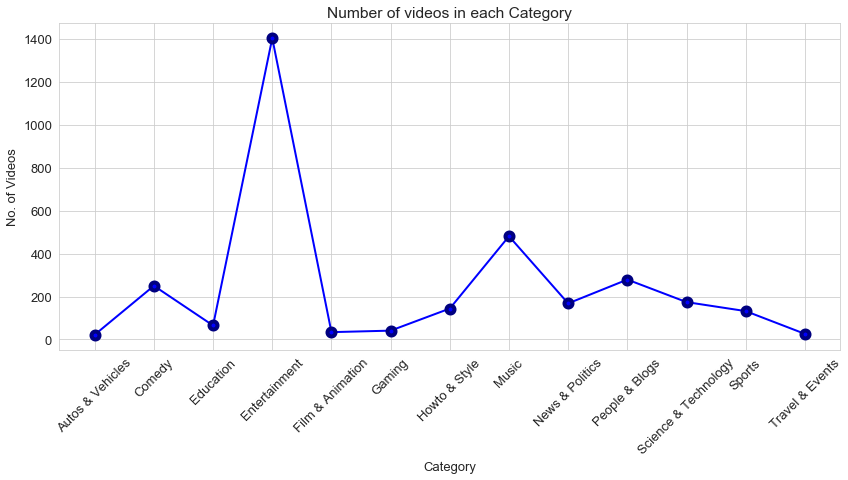

In [34]:
plt.title("Number of videos in each Category")
plt.plot(categories_overall.category, categories_overall.videos_count, 'b-o', linewidth=2, markersize=8, markeredgewidth=4, markeredgecolor='navy');
plt.xlabel('Category'); 
plt.ylabel('No. of Videos');
plt.xticks(rotation=45);

> From the above graph the top 3 categories having most of the videos in trending are : **Entertainment, Music and People & Blogs** .

----

In [35]:
categories_overall['views_per_video'] = (categories_overall.view_count / categories_overall.videos_count).astype(int)
categories_overall

,category,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,videos_count,views_per_video
0,Autos & Vehicles,11311096,352777,18877,31142,0,0,22,514140
1,Comedy,447873169,36206614,932676,2390701,0,0,250,1791492
2,Education,45853348,2092676,110034,294214,1,0,65,705436
3,Entertainment,2303639590,75899864,16198109,7468795,12,2,1404,1640768
4,Film & Animation,93779369,3103028,2007856,543224,0,0,34,2758216
5,Gaming,173358946,9098393,295990,742835,0,0,41,4228266
6,Howto & Style,148819084,5796135,470860,490819,0,3,144,1033465
7,Music,2934369009,171526104,10527220,29805625,1,2,481,6100559
8,News & Politics,141592697,3605726,1766787,637841,5,20,168,842813
9,People & Blogs,286019268,16628002,618042,1408165,10,7,279,1025158


#### Which category has a better average views per video?

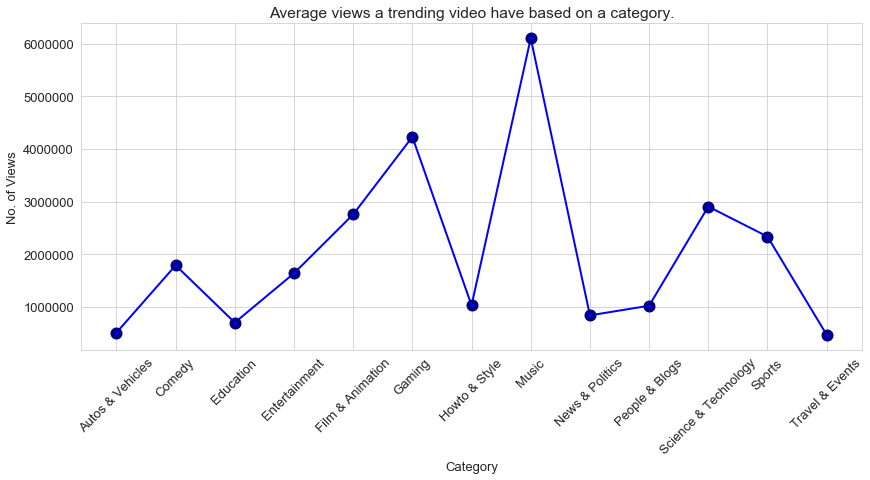

In [36]:
plt.title("Average views a trending video have based on a category.")
plt.plot(categories_overall.category, categories_overall.views_per_video, 'b-o', linewidth=2, markersize=8, markeredgewidth=4, markeredgecolor='navy');
plt.xlabel('Category'); 
plt.ylabel('No. of Views');
plt.xticks(rotation=45);

> Even thoug the Entertainment has most number of videos even then the average views per video is much lesser then many other categories, whereas the Music category which contributes to the third most number of videos has the maximum number of average views. 

----

#### Which category has a larger user reactions(LIKE and DISLIKE)?

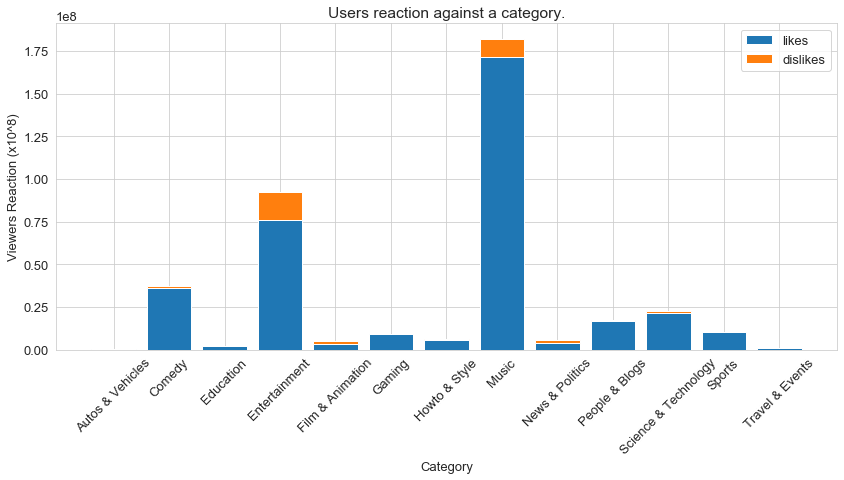

In [37]:
plt.title("Users reaction against a category.")
plt.bar(categories_overall.category, categories_overall.likes);
plt.bar(categories_overall.category, categories_overall.dislikes, bottom=categories_overall.likes);
plt.xticks(rotation=45);
plt.legend(['likes', 'dislikes']);
plt.xlabel('Category'); 
plt.ylabel('Viewers Reaction (x10^8)');

> The graph clearly shows that distinctive portion of Entertainment viewers happens to dislike the video.

----

In [38]:
unique_creator_df = youtube_trending_df2.groupby('channelTitle', as_index=False).sum()
unique_creator_df.head(5)

,channelTitle,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled
0,10 Mint Records,1124702,103128,2244,5250,0,0
1,10TV News Telugu,5900530,111287,4489,3316,0,0
2,123 GO! CHALLENGE,12541297,106935,20574,6906,0,0
3,123 GO! Hindi,29864123,233629,58304,11295,0,0
4,20th Century Studios,2334320,74824,1894,6699,0,0


In [39]:
unique_creator_df['videos_count'] = youtube_trending_df2.groupby('channelTitle',  as_index=False).count().title
unique_creator_df.head(5)

,channelTitle,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,videos_count
0,10 Mint Records,1124702,103128,2244,5250,0,0,1
1,10TV News Telugu,5900530,111287,4489,3316,0,0,3
2,123 GO! CHALLENGE,12541297,106935,20574,6906,0,0,3
3,123 GO! Hindi,29864123,233629,58304,11295,0,0,9
4,20th Century Studios,2334320,74824,1894,6699,0,0,2


In [40]:
print("### The dataframes has {} unique creators.".format(unique_creator_df.shape[0]))

### The dataframes has 973 unique creators.


----

#### Which youtube creator has a most content reaching to trending section?

In [41]:
unique_creater = unique_creator_df.sort_values('videos_count', ascending=False)
print("### TOP 15 YOUTUBERS WITH MOST CONTENT \n REACHING TO TRENDING SECTION- ###")
unique_creater[['channelTitle', 'videos_count']].head(20).style.hide_index() # Top 20 youtubers

### TOP 15 YOUTUBERS WITH MOST CONTENT 
 REACHING TO TRENDING SECTION- ###


channelTitle,videos_count
Colors TV,92
Vijay Television,91
Tarang TV,72
Star Maa,44
Crazy XYZ,41
SAB TV,36
ARY Digital,36
Flowers Comedy,33
Taarak Mehta Ka Ooltah Chashmah,27
Sambhavna Seth Entertainment,27


> The above list shows the top 15 youtubers with most content reaching the trending section.

----

In [42]:
top_10_creators_df = unique_creater.iloc[0:10, :]
top_10_creators_df

,channelTitle,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,videos_count
153,Colors TV,74908152,782081,59883,30444,0,0,92
877,Vijay Television,144441301,2098755,80036,101487,0,0,91
785,Tarang TV,52229708,408639,52413,17473,0,0,72
734,Star Maa,89832843,1355653,51986,316424,0,0,44
159,Crazy XYZ,68759673,5352814,295304,335627,0,0,41
637,SAB TV,80905943,930328,96463,36520,0,0,36
23,ARY Digital,74320108,600830,37256,25242,0,0,36
243,Flowers Comedy,45245546,1209215,64614,120412,0,0,33
777,Taarak Mehta Ka Ooltah Chashmah,132142139,2054068,155501,118818,0,0,27
659,Sambhavna Seth Entertainment,25947423,2164520,28417,168659,0,0,27


----

#### Which youtube channel has most average views per video?

In [43]:
top_10_creators_df['views_per_video'] = (top_10_creators_df.view_count / top_10_creators_df.videos_count).astype(int)
top_10_creators_df

,channelTitle,view_count,likes,dislikes,comment_count,comments_disabled,ratings_disabled,videos_count,views_per_video
153,Colors TV,74908152,782081,59883,30444,0,0,92,814219
877,Vijay Television,144441301,2098755,80036,101487,0,0,91,1587267
785,Tarang TV,52229708,408639,52413,17473,0,0,72,725412
734,Star Maa,89832843,1355653,51986,316424,0,0,44,2041655
159,Crazy XYZ,68759673,5352814,295304,335627,0,0,41,1677065
637,SAB TV,80905943,930328,96463,36520,0,0,36,2247387
23,ARY Digital,74320108,600830,37256,25242,0,0,36,2064447
243,Flowers Comedy,45245546,1209215,64614,120412,0,0,33,1371077
777,Taarak Mehta Ka Ooltah Chashmah,132142139,2054068,155501,118818,0,0,27,4894153
659,Sambhavna Seth Entertainment,25947423,2164520,28417,168659,0,0,27,961015


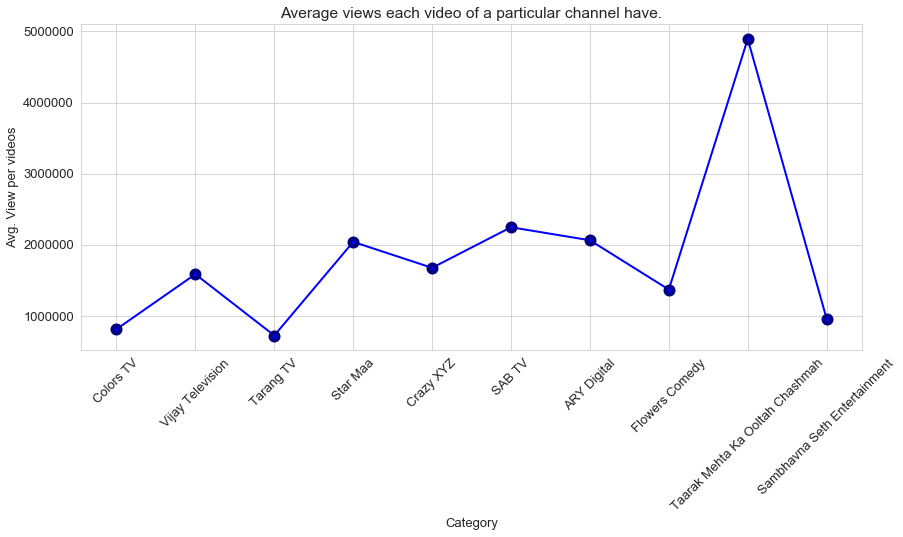

In [44]:
plt.title("Average views each video of a particular channel have.")
plt.plot(top_10_creators_df.channelTitle, top_10_creators_df.views_per_video, 'b-o', linewidth=2, markersize=8, markeredgewidth=4, markeredgecolor='navy');
plt.xlabel('Category'); 
plt.ylabel('Avg. View per videos');
plt.xticks(rotation=45);

> The above graph clearly represents that even though having much less uploads then many other channels TMKOC is able to reach a wider and have a reliable audience. 

----

#### Which channel gets the most user reaction in their videos?

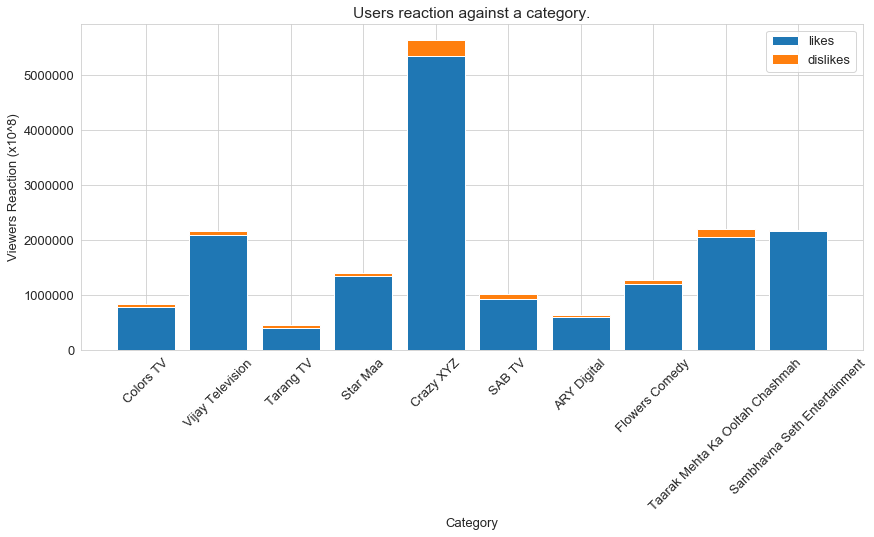

In [45]:
plt.title("Users reaction against a category.")
plt.bar(top_10_creators_df.channelTitle, top_10_creators_df.likes);
plt.bar(top_10_creators_df.channelTitle, top_10_creators_df.dislikes, bottom=top_10_creators_df.likes);
plt.xticks(rotation=45);
plt.legend(['likes', 'dislikes']);
plt.xlabel('Category'); 
plt.ylabel('Viewers Reaction (x10^8)');

> Even after much less uploads then many other youtube channels Crazy XYZ is able to make users to like the content. 

----

## Inferences and Conclusion
1. Out of many categories(genre) only few end up reaching to the trending section.
2. Creators uploading videos frequently have a better chance reaching the trends section.
3. Videos of categories like Entertainment, Music and People & Blog makes major part of the trend listing.
4. Contents of youtube channels of popular pay Television channel are frequent to appear on trends.    